In [1]:
import numpy as np
from pomegranate import *
import itertools

### Trying bayes net in pomegranate

In [2]:
#generate example data
n = 10
h = BernoulliDistribution(0.3).sample(n)
w = BernoulliDistribution(0.6).sample(n)
l = BernoulliDistribution(0.7).sample(n) 

In [3]:
# 1. Initialize parameters (uniform)

height = DiscreteDistribution({'short':0.5, 'tall':0.5})
weight = DiscreteDistribution({'low':0.5, 'high':0.5})
sex = ConditionalProbabilityTable([
    ['short', 'low', 'm', 0.5],
    ['short', 'low', 'f', 0.5],
    ['short', 'high', 'm', 0.5],
    ['short', 'high', 'f', 0.5],
    ['tall', 'low', 'm', 0.5],
    ['tall', 'low', 'f', 0.5],
    ['tall', 'high', 'm', 0.5],
    ['tall', 'high', 'f', 0.5]], [height, weight] )
hair = ConditionalProbabilityTable([
    ['m', 'sh', 0.5],
    ['m', 'long', 0.5],
    ['f', 'sh', 0.5],
    ['f', 'long', 0.5]], [sex] )
    

In [4]:
# create state objects (nodes)

s_h = State(height, name='height')
s_w = State(weight, name='weight')
s_s = State(sex, name='sex')
s_l = State(hair, name='hair')

In [5]:
# create the model

model = BayesianNetwork("Hair Length")

# Add the three states to the network 

model.add_states(s_h, s_w, s_s, s_l)

In [6]:
# build the DAG

model.add_transition(s_h, s_s)
model.add_transition(s_w, s_s)
model.add_transition(s_s, s_l)
model.bake()

In [13]:
model.predict_proba({'height':'short','weight':'low'})

array([ {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "tall" :0.0,
            "short" :1.0
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "high" :0.0,
            "low" :1.0
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "m" :0.5,
            "f" :0.5
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "sh" :0.5,
            "long" :0.5
        }
    ],
    "name" :"DiscreteDistribution"
}], dtype=object)

In [8]:
[state.name for state in model.states]

['height', 'weight', 'sex', 'hair']

In [19]:
s_s.distribution.column_idxs

array([0, 1, 2], dtype=int32)

In [20]:
s_l.distribution.column_idxs

array([2, 3], dtype=int32)

### A simple model for trying things 

In [13]:
A = DiscreteDistribution({1:0.45,0:0.55})
B = ConditionalProbabilityTable([
    [1, 0, 0.3],
    [1, 1, 0.7],
    [0, 0, 0.4],
    [0, 1, 0.6]], [A] )

In [14]:
s_A = State(A, name='A')
s_B = State(B, name='B')

In [15]:
test_model = BayesianNetwork("test")
test_model.add_states(s_A, s_B)
test_model.add_transition(s_A, s_B)
test_model.bake()

In [5]:
name_list = [s.name for s in test_model.states]

In [36]:
test_model.states[0].distribution.parameters[0][0]=0.99

In [37]:
test_model.states[0].distribution.parameters

[{0: 0.99, 1: 0.45}]

In [38]:
test_model.states

[{
     "distribution" : {
         "frozen" : false,
         "class" : "Distribution",
         "parameters" : [
             {
                 "1" : 0.45,
                 "0" : 0.99
             }
         ],
         "name" : "DiscreteDistribution"
     },
     "class" : "State",
     "weight" : 1.0,
     "name" : "A"
 }, {
     "distribution" : {
         "table" : [
             [
                 "0",
                 "0",
                 "0.4"
             ],
             [
                 "0",
                 "1",
                 "0.6"
             ],
             [
                 "1",
                 "0",
                 "0.3"
             ],
             [
                 "1",
                 "1",
                 "0.7"
             ]
         ],
         "parents" : [
             {
                 "frozen" : false,
                 "class" : "Distribution",
                 "parameters" : [
                     {
                         "1" : 0.45,
          

In [6]:
# getting the conditional probability

prob_B = test_model.predict_proba({'A':1})[1]

In [7]:
prob_B

{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.6999999999999998,
            "0" :0.3000000000000001
        }
    ],
    "name" :"DiscreteDistribution"
}

In [8]:
prob_B.probability(1)

0.69999999999999984

In [20]:
data = np.asarray([[0,1],[0,0],[1,1],[1,1],[0,0],[1,0],[0,0]])

In [19]:
s_A.distribution.marginal()

{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.42857142857142855,
            "0" :0.5714285714285714
        }
    ],
    "name" :"DiscreteDistribution"
}

In [22]:
test_model.fit(data)

{
    "states" : [
        {
            "distribution" : {
                "frozen" : false,
                "class" : "Distribution",
                "parameters" : [
                    {
                        "1" : 0.42857142857142855,
                        "0" : 0.5714285714285714
                    }
                ],
                "name" : "DiscreteDistribution"
            },
            "class" : "State",
            "weight" : 1.0,
            "name" : "A"
        },
        {
            "distribution" : {
                "table" : [
                    [
                        "1",
                        "0",
                        "0.333333333333"
                    ],
                    [
                        "1",
                        "1",
                        "0.666666666667"
                    ],
                    [
                        "0",
                        "0",
                        "0.75"
                    ],
                   

In [11]:
test_model.predict_proba()

array([ {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.42857142857142866,
            "0" :0.5714285714285714
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "1" :0.4285714285714286,
            "0" :0.5714285714285713
        }
    ],
    "name" :"DiscreteDistribution"
}], dtype=object)

In [15]:
type(test_model)

pomegranate.BayesianNetwork.BayesianNetwork

### Model for testing 2

In [18]:
A = DiscreteDistribution({'1':0.2, '0':0.8})
H = ConditionalProbabilityTable([
        ['0', '0', 0.4],
        ['0', '1', 0.6],
        ['1', '0', 0.3],
        ['1', '1', 0.7]], [A])
B = ConditionalProbabilityTable([
        ['0', '0', 0.6],
        ['0', '1', 0.4],
        ['1', '0', 0.5],
        ['1', '1', 0.5]], [H])

In [19]:
s_A = State(A, name='A')
s_H = State(H, name='H')
s_B = State(B, name='B')

In [20]:
test_model2 = BayesianNetwork("test2")
test_model2.add_states(s_A, s_H, s_B)
test_model2.add_transition(s_A, s_H)
test_model2.add_transition(s_H, s_B)
test_model2.bake()

Data:

In [21]:
data2 = np.array([[0, np.nan, 0],
                   [0, np.nan, 1],
                   [1, np.nan, 0],
                   [1, np.nan, 1],
                   [1, np.nan, 0],
                   [0, np.nan, 1],
                   [1, np.nan, 1],
                   [1, np.nan, 0]], dtype='str')

In [26]:
data2[:, [0,2]]

array([['0', '0'],
       ['0', '1'],
       ['1', '0'],
       ['1', '1'],
       ['1', '0'],
       ['0', '1'],
       ['1', '1'],
       ['1', '0']], 
      dtype='|S3')

Test:

In [10]:
mb2 = MarkovBlanket(1)
mb2.populate(test_model2)
mb2.calculate_prob(test_model2)

In [13]:
mb2.prob_table

{1: {('0', '0'): 0.4, ('0', '1'): 0.6, ('1', '0'): 0.3, ('1', '1'): 0.7},
 2: {('0', '0'): 0.6, ('0', '1'): 0.4, ('1', '0'): 0.5, ('1', '1'): 0.5}}

In [87]:
expected_counts2 = create_expected_counts(test_model2, mb2) 

In [88]:
expected_counts2

{(0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 1, 0): 0,
 (0, 1, 1): 0,
 (1, 0, 0): 0,
 (1, 0, 1): 0,
 (1, 1, 0): 0,
 (1, 1, 1): 0}

In [110]:
expected_counts2 = update_expected_counts(expected_counts2, test_model2, mb2)

{(0, 1): 0.46, (1, 0): 0.53, (0, 0): 0.54, (1, 1): 0.47}


In [111]:
expected_counts2

{(0, 0, 0): 0.4444444444444444,
 (0, 0, 1): 0.3478260869565218,
 (0, 1, 0): 0.33962264150943394,
 (0, 1, 1): 0.2553191489361702,
 (1, 0, 0): 0.5555555555555555,
 (1, 0, 1): 0.6521739130434782,
 (1, 1, 0): 0.660377358490566,
 (1, 1, 1): 0.7446808510638298}

In [105]:
mb2.parents

[0]

## Building the EM

Steps:
1. Initialize parameters with near uniform values.
2. Build the model with the initialized parameters. 
3. Expectation: Calculate the expected counts for the hidden variables. Update the data for the hidden variables. 
4. Maximization: Calculate MLE for all parameters by summing over expected counts. 
5. Update the model with the new parameter values.
6. Iterate 3-5 until converges.


In [2]:
def search_hidden(data):
    """Returns the column index of the hidden node if only one column of NaN.
    Only works if data is numeric.
    
    Parameters
    ----------
    data : An ndarray (n_sample, n_nodes)
    
    Returns
    -------
    ind_h : the index of the hidden node column
    """
    is_col_nan = np.all(np.isnan(data), axis=0)
    ind = np.where(is_col_nan)
    if np.size(ind)==1:
        ind_h = ind[0][0]
    else:
        raise ValueError('Data contains more than one hidden nodes or no hidden node')
    return ind_h
    

In [3]:
class MarkovBlanket():
    """
    An object for storing info on nodes within the markov blanket of the hidden node
    
    Parameters
    ----------
    ind_h : int
        index of the hidden node within the model
        
    Attributes
    ----------
    hidden : int
        index of the hidden node
        
    parents : list of int
        a list of indices of the parent nodes 
        
    children : list of int
        a list of indices of the children nodes
        
    coparents : list of int
        a list of indices of the coparent nodes
        
    prob_table : dict
        a dict of probabilities table of nodes within the Markov blanket
    
    """
    
    def __init__(self, ind_h):
        self.hidden = ind_h
        self.parents = []
        self.children = []
        self.coparents = []
        self.prob_table = {}
        
    def populate(self, model):
        """populate the parents, children, and coparents nodes
        """
        state_indices = {state.name : i for i, state in enumerate(model.states)}
        
        edges_list = [(parent.name, child.name) for parent, child in model.edges]
        edges_list = [(state_indices[parent],state_indices[child]) 
                  for parent, child in edges_list]
        
        self.children = list(set([child for parent, child in edges_list if parent==self.hidden]))
        self.parents = list(set([parent for parent, child in edges_list if child==self.hidden]))
        self.coparents = list(set([parent for parent, child in edges_list if child in self.children]))
        try:
            self.coparents.remove(self.hidden)
        except ValueError:
            pass
            
    def calculate_prob(self, model):
        """Create the probability table from nodes
        """
        for ind_state in [self.hidden]+self.children:
            distribution = model.states[ind_state].distribution
            
            if isinstance(distribution, ConditionalProbabilityTable):
                table = list(distribution.parameters[0]) # make a copy
                self.prob_table[ind_state] = {
                    tuple(row[:-1]) : row[-1] for row in table}
            else:
                self.prob_table[ind_state] = dict(distribution.parameters[0]) # make a copy
                
    def update_prob(self, model, expected_counts, ct):
        """Update the probability table using expected counts
        """
        ind = {x : i for i, x in enumerate([self.hidden] + self.parents + self.children + self.coparents)}
        mb_keys = expected_counts.counts.keys()
        
        for ind_state in [self.hidden] + self.children:
            distribution = model.states[ind_state].distribution
            
            if isinstance(distribution, ConditionalProbabilityTable):
                idxs = distribution.column_idxs
                table = self.prob_table[ind_state] # dict
                
                # calculate the new parameter for this key
                for key in table.keys():
                    num = 0
                    denom = 0
                    
                    # marginal counts
                    for mb_key in mb_keys:
                        # marginal counts of node + parents
                        if tuple([mb_key[ind[x]] for x in idxs]) == key:
                            num += ct.table[mb_key[1:]]*expected_counts.counts[mb_key] 
                            
                        # marginal counts of parents
                        if tuple([mb_key[ind[x]] for x in idxs[:-1]]) == key[:-1]:
                            denom += ct.table[mb_key[1:]]*expected_counts.counts[mb_key]
                            
                    try:
                        prob = num/denom
                    except ZeroDivisionError:
                        prob = 0
                        
                    # update the parameter
                    table[key] = prob
                    
            else: # DiscreteProb
                table = self.prob_table[ind_state] # dict 
                
                # calculate the new parameter for this key
                for key in table.keys():
                    prob = 0
                    for mb_key in mb_keys:
                        if mb_key[ind[ind_state]] == key:
                            prob += ct.table[mb_key[1:]]*expected_counts.counts[mb_key]
                    
                    # update the parameter
                    table[key] = prob/ct.size
                

In [4]:
class ExpectedCounts():
    """Calculate the expected counts using the model parameters
    
    Parameters
    ----------
    model : a BayesianNetwork object
    
    mb : a MarkovBlanket object
    
    Attributes
    ----------
    counts : dict
        a dict of expected counts for nodes in the Markov blanket
    """
    
    def __init__(self, model, mb):
        self.counts = {}
        
        self.populate(model, mb)
        
    def populate(self, model, mb):
        #create combinations of keys
        keys_list = [model.states[mb.hidden].distribution.keys()]
        for ind in mb.parents + mb.children + mb.coparents:
            keys_list.append(model.states[ind].distribution.keys())
        
        self.counts = {p:0 for p in itertools.product(*keys_list)}
        
    def update(self, model, mb):
        ind = {x : i for i, x in enumerate([mb.hidden] + mb.parents + mb.children + mb.coparents)}
    
        marginal_prob = {}
    
        # calculate joint probability and marginal probability
        for i, key in enumerate(self.counts.keys()):
            prob = 1
        
            for j, ind_state in enumerate([mb.hidden] + mb.children):
                distribution = model.states[ind_state].distribution
            
                if isinstance(distribution, ConditionalProbabilityTable):
                    idxs = distribution.column_idxs
                    state_key = tuple([key[ind[x]] for x in idxs])
                else:
                    state_key = key[ind[ind_state]]
                
                prob = prob*mb.prob_table[ind_state][state_key]         
                self.counts[key] = prob
            try:
                marginal_prob[key[1:]] += prob
            except KeyError:
                marginal_prob[key[1:]] = prob
                 
        # divide the joint prob by the marginal prob to get the conditional
        for i, key in enumerate(self.counts.keys()):
            try:
                self.counts[key] = self.counts[key]/marginal_prob[key[1:]]
            except ZeroDivisionError:
                self.counts[key] = 0
        

In [5]:
class CountTable():
    """Counting the data"""
    
    def __init__(self, model, mb, items):
        """
        Parameters
        ----------
        model : BayesianNetwork object
        
        mb : MarkovBlanket object
        
        items : ndarray
            columns are data for parents, children, coparents
        
        """
        self.table ={}
        self.ind = {}
        self.size = items.shape[0]
        
        self.populate(model, mb, items)
        
    def populate(self, model, mb, items):
        keys_list = []
        for ind in mb.parents + mb.children + mb.coparents:
            keys_list.append(model.states[ind].distribution.keys())
        
        # init
        self.table = {p:0 for p in itertools.product(*keys_list)}
        self.ind = {p:[] for p in itertools.product(*keys_list)}
        
        # count
        for i, row in enumerate(items):
            try:
                self.table[tuple(row)] += 1
                self.ind[tuple(row)].append(i)
            except KeyError:
                print 'Items in row', i, 'does not match the set of keys.'
                raise KeyError
    

In [6]:
def em_bayesnet(model, data, ind_h, max_iter = 50, criteria = 0.005, verbose=False):
    """Returns the data array with the hidden node filled in.
    (model is not modified.)
    
    Parameters
    ----------
    model : a BayesianNetwork object
        an already baked BayesianNetwork object with initialized parameters
        
    data : an ndarray
        each column is the data for the node in the same order as the nodes in the model
        the hidden node should be a column of NaNs
        
    ind_h : int
        index of the hidden node
        
    max_iter : int
        maximum number of iterations
        
    criteria : float between 0 and 1
        the change in probability in consecutive iterations, below this value counts as convergence 
        
    verbose : boolean
        if True then the function prints an update with each iteration
        
    Returns
    -------
    data : an ndarray
        the same data arary with the hidden node column filled in
    """
    
    # create the Markov blanket object for the hidden node
    mb = MarkovBlanket(ind_h)
    mb.populate(model)
    mb.calculate_prob(model)
    
    # create the count table from data
    items = data[:, mb.parents + mb.children + mb.coparents]
    ct = CountTable(model, mb, items)
    
    # create expected counts
    expected_counts = ExpectedCounts(model, mb)
    expected_counts.update(model, mb)
    
    # ---- iterate over the E-M steps
    i = 0
    previous_params = np.array(mb.prob_table[mb.hidden].values())
    convergence = False
    
    while (not convergence) and (i < max_iter):
        mb.update_prob(model, expected_counts, ct)
        expected_counts.update(model, mb)
        if verbose : print 'Iteration',i,mb.prob_table,'\n'
        
        # convergence criteria
        hidden_params = np.array(mb.prob_table[mb.hidden].values())
        change = abs(hidden_params - previous_params)
        convergence = max(change) < criteria
        previous_params = np.array(mb.prob_table[mb.hidden].values())
        
        i += 1
        
    if i == max_iter:
        print 'Maximum iterations reached.'
    
    # ---- fill in the hidden node data by sampling the distribution
    labels = {}
    for key, prob in expected_counts.counts.items():
        try:
            labels[key[1:]].append((key[0], prob))
        except:
            labels[key[1:]] = [(key[0], prob)]
            
    new_data = data.copy()       
    for key, counts in ct.table.items():
        label, prob = zip(*labels[key])
        prob = tuple(round(p,5) for p in prob)
        if not all(p == 0 for p in prob):
            samples = np.random.choice(label, size=counts, p=prob)
            new_data[ct.ind[key], ind_h] = samples
        
    return new_data
    

In [22]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [25]:
a

array([[ 1, 33,  3],
       [ 4, 44,  6],
       [ 7, 55,  9]])

In [24]:
a[:,1] = [33,44,55]

In [17]:
b = a.copy()

In [20]:
b[0] = 99
b

array([[99, 99, 99],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [25]:
a[[1,2]][:,1] = [99,99]

In [50]:
a[[0,1],1] = [98,99]

In [27]:
em_bayesnet(test_model2, data2, 1)

array([['0', '1', '0'],
       ['0', '1', '1'],
       ['1', '1', '0'],
       ['1', '1', '1'],
       ['1', '1', '0'],
       ['0', '1', '1'],
       ['1', '1', '1'],
       ['1', '1', '0']], 
      dtype='|S3')

In [78]:
data2

array([[  0.,  nan,   0.],
       [  0.,  nan,   1.],
       [  1.,  nan,   0.],
       [  1.,  nan,   1.],
       [  1.,  nan,   0.],
       [  0.,  nan,   1.],
       [  1.,  nan,   1.],
       [  1.,  nan,   0.]])

In [14]:
mb2 = MarkovBlanket(1)
mb2.populate(test_model2)
mb2.calculate_prob(test_model2)

In [14]:
ct = CountTable(test_model2, mb2, data2[:,[0,2]])

In [16]:
ct.table

{('0', '0'): 1, ('0', '1'): 2, ('1', '0'): 3, ('1', '1'): 2}

In [18]:
expected_counts = ExpectedCounts(test_model2, mb2)

In [20]:
expected_counts.update(test_model2, mb2)

In [21]:
expected_counts.counts

{('0', '0', '0'): 0.4444444444444444,
 ('0', '0', '1'): 0.3478260869565218,
 ('0', '1', '0'): 0.33962264150943394,
 ('0', '1', '1'): 0.2553191489361702,
 ('1', '0', '0'): 0.5555555555555555,
 ('1', '0', '1'): 0.6521739130434782,
 ('1', '1', '0'): 0.660377358490566,
 ('1', '1', '1'): 0.7446808510638298}

In [59]:
mb2.prob_table

{1: {('0', '0'): 0.3800322061191627,
  ('0', '1'): 0.6199677938808373,
  ('1', '0'): 0.30590124448012845,
  ('1', '1'): 0.6940987555198715},
 2: {('0', '0'): 0.5481386019791565,
  ('0', '1'): 0.4518613980208435,
  ('1', '0'): 0.4758909243055429,
  ('1', '1'): 0.5241090756944571}}

In [53]:
mb.prob_table[3]

{('f', 'long'): 0.5, ('f', 'sh'): 0.5, ('m', 'long'): 0.5, ('m', 'sh'): 0.5}

In [52]:
expected_counts

{('f', 'short', 'high', 'long'): 0.25,
 ('f', 'short', 'high', 'sh'): 0.25,
 ('f', 'short', 'low', 'long'): 0.25,
 ('f', 'short', 'low', 'sh'): 0.25,
 ('f', 'tall', 'high', 'long'): 0.25,
 ('f', 'tall', 'high', 'sh'): 0.25,
 ('f', 'tall', 'low', 'long'): 0.25,
 ('f', 'tall', 'low', 'sh'): 0.25,
 ('m', 'short', 'high', 'long'): 0.25,
 ('m', 'short', 'high', 'sh'): 0.25,
 ('m', 'short', 'low', 'long'): 0.25,
 ('m', 'short', 'low', 'sh'): 0.25,
 ('m', 'tall', 'high', 'long'): 0.25,
 ('m', 'tall', 'high', 'sh'): 0.25,
 ('m', 'tall', 'low', 'long'): 0.25,
 ('m', 'tall', 'low', 'sh'): 0.25}

In [18]:
model.states[2].distribution.parameters[0]

[['short', 'low', 'm', 0.5],
 ['short', 'low', 'f', 0.5],
 ['short', 'high', 'm', 0.5],
 ['short', 'high', 'f', 0.5],
 ['tall', 'low', 'm', 0.5],
 ['tall', 'low', 'f', 0.5],
 ['tall', 'high', 'm', 0.5],
 ['tall', 'high', 'f', 0.5]]

Funtional tests
Requirements:
1. data with NaN outside of the hidden node should raise exception
2. correct output for input data of type str, float/int

In [7]:
import unittest

In [8]:
class TestDataType(unittest.TestCase):
    def test_int_input(self):
        data = np.array([[0,np.nan,0,0],
               [0,np.nan,0,0],
               [0,np.nan,0,1],
               [0,np.nan,1,1],
               [1,np.nan,0,0],
               [1,np.nan,1,1],
               [1,np.nan,1,1],
               [1,np.nan,1,1]])
        cloudy = DiscreteDistribution({0:0.4,1:0.6})
        sprinkler = ConditionalProbabilityTable([
            [1, 0, 0.7],
            [1, 1, 0.23],
            [0, 0, 0.4],
            [0, 1, 0.6]], [cloudy] )
        rain = ConditionalProbabilityTable([
            [1, 0, 0.2],
            [1, 1, 0.8],
            [0, 0, 0.7],
            [0, 1, 0.3]], [cloudy] )
        wetgrass = ConditionalProbabilityTable([
            [0, 0, 0, 0.8],
            [0, 0, 1, 0.2],
            [0, 1, 0, 0.1],
            [0, 1, 1, 0.9],
            [1, 0, 0, 0.1],
            [1, 0, 1, 0.9],
            [1, 1, 0, 0.1],
            [1, 1, 1, 0.9]], [sprinkler, rain] )
        
        s_c = State(cloudy, 'cloudy')
        s_s = State(sprinkler, 'sprinkler')
        s_r = State(rain, 'rain')
        s_w = State(wetgrass, 'wetgrass')
        
        model = BayesianNetwork('wet')
        model.add_states(s_c, s_s, s_r, s_w)
        model.add_transition(s_c, s_s)
        model.add_transition(s_c, s_r)
        model.add_transition(s_s, s_w)
        model.add_transition(s_r, s_w)
        model.bake()
        
        new_data = em_bayesnet(model, data, 1)
        
        print new_data

#if __name__ == "__main__":
#    unittest.main()

In [47]:
class TestDataType(unittest.TestCase):
    
    def test_int_input(self):
        data = np.array([[0,np.nan],
               [0,np.nan],
               [1,np.nan],
               [1,np.nan]])
        A = DiscreteDistribution({0:0.4, 1:0.6})
        B = ConditionalProbabilityTable([
            [0, 0, 1.0],
            [0, 1, 0.0],
            [1, 0, 0.0],
            [1, 1, 1.0]], [A] )
        
        s_A = State(A, 'A')
        s_B = State(B, 'B')
        
        model = BayesianNetwork('copy')
        model.add_states(s_A, s_B)
        model.add_transition(s_A, s_B)
        model.bake()
        
        new_data = em_bayesnet(model, data, 1)
        
        correct_output = np.array([
            [0, 0],
            [0, 0],
            [1, 1],
            [1, 1]])
        
        self.assertEqual(new_data.tolist(), correct_output.tolist())
        
    def test_str_input(self):
        data = np.array([['0',np.nan],
               ['0',np.nan],
               ['1',np.nan],
               ['1',np.nan]])
        A = DiscreteDistribution({'0':0.4, '1':0.6})
        B = ConditionalProbabilityTable([
            ['0', '0', 1.0],
            ['0', '1', 0.0],
            ['1', '0', 0.0],
            ['1', '1', 1.0]], [A] )
        
        s_A = State(A, 'A')
        s_B = State(B, 'B')
        
        model = BayesianNetwork('copy')
        model.add_states(s_A, s_B)
        model.add_transition(s_A, s_B)
        model.bake()
        
        new_data = em_bayesnet(model, data, 1)
        
        correct_output = np.array([
            ['0', '0'],
            ['0', '0'],
            ['1', '1'],
            ['1', '1']])
        
        self.assertEqual(new_data.tolist(), correct_output.tolist())
        

if __name__ == "__main__":
    #unittest.main()
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..

em_bayesnet data =  [[  0.  nan]
 [  0.  nan]
 [  1.  nan]
 [  1.  nan]]
MarkovBlanket prob_table =  {1: {(0, 1): 0.0, (1, 0): 0.0, (0, 0): 1.0, (1, 1): 1.0}}
Iteration 0 {1: {(0, 1): 0.0, (1, 0): 0.0, (0, 0): 1.0, (1, 1): 1.0}}
   [ 0.  0.  0.  0.]
Labels =  {(0,): [(1, 0.0), (0, 1.0)], (1,): [(0, 0.0), (1, 1.0)]} 

Key  (0,) (1, 0) (0.0, 1.0) [0 0]
Key  (1,) (0, 1) (0.0, 1.0) [1 1]
[[ 0.  0.]
 [ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]] [[0 0]
 [0 0]
 [1 1]
 [1 1]]
em_bayesnet data =  [['0' 'nan']
 ['0' 'nan']
 ['1' 'nan']
 ['1' 'nan']]
MarkovBlanket prob_table =  {1: {('1', '0'): 0.0, ('0', '1'): 0.0, ('1', '1'): 1.0, ('0', '0'): 1.0}}
Iteration 0 {1: {('1', '0'): 0.0, ('0', '1'): 0.0, ('1', '1'): 1.0, ('0', '0'): 1.0}}
   [ 0.  0.  0.  0.]
Labels =  {('1',): [('0', 0.0), ('1', 1.0)], ('0',): [('1', 0.0), ('0', 1.0)]} 

Key  ('1',) ('0', '1') (0.0, 1.0) ['1' '1']
Key  ('0',) ('1', '0') (0.0, 1.0) ['0' '0']
[['0' '0']
 ['0' '0']
 ['1' '1']
 ['1' '1']] [['0' '0']
 ['0' '0']
 ['1' '1']
 ['1' '1']


----------------------------------------------------------------------
Ran 2 tests in 0.028s

OK


In [13]:
test = RainTest()

In [30]:
test.test_sprinkler()

em_bayesnet data =  [[  0.  nan   0.   0.]
 [  0.  nan   0.   0.]
 [  0.  nan   0.   1.]
 [  0.  nan   1.   1.]
 [  1.  nan   0.   0.]
 [  1.  nan   1.   1.]
 [  1.  nan   1.   1.]
 [  1.  nan   1.   1.]]
MarkovBlanket prob_table =  {1: {(0, 1): 0.6, (1, 0): 0.7, (0, 0): 0.4, (1, 1): 0.23}, 3: {(0, 1, 1): 0.9, (1, 1, 0): 0.1, (1, 0, 0): 0.1, (0, 0, 1): 0.2, (1, 0, 1): 0.9, (0, 0, 0): 0.8, (0, 1, 0): 0.1, (1, 1, 1): 0.9}}
CountTable table =  {(0, 1, 1): 0, (1, 1, 0): 0, (1, 0, 0): 0, (0, 0, 1): 0, (1, 0, 1): 0, (0, 0, 0): 0, (0, 1, 0): 0, (1, 1, 1): 0}
CountTable row : (0.0, 0.0, 0.0)
CountTable row : (0.0, 0.0, 0.0)
CountTable row : (0.0, 1.0, 0.0)
CountTable row : (0.0, 1.0, 1.0)
CountTable row : (1.0, 0.0, 0.0)
CountTable row : (1.0, 1.0, 1.0)
CountTable row : (1.0, 1.0, 1.0)
CountTable row : (1.0, 1.0, 1.0)
[ 0.1533107   0.10465335  0.1533107   0.03465335]
[ 0.00528861  0.03166255  0.00528861  0.03166255]
[ 0.01270834  0.02518209  0.01270834  0.02518209]
[ 0.01268642  0.02139549  0.

In [14]:
np.random.choice([1,0],size=10,p=(0.024,0.976))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
(x for x in [1,2,3])

<generator object <genexpr> at 0x119498190>

In [22]:
new_data = em_bayesnet(test_model2, data2, 1)

em_bayesnet data =  [['0' 'nan' '0']
 ['0' 'nan' '1']
 ['1' 'nan' '0']
 ['1' 'nan' '1']
 ['1' 'nan' '0']
 ['0' 'nan' '1']
 ['1' 'nan' '1']
 ['1' 'nan' '0']]
MarkovBlanket prob_table =  {1: {('1', '0'): 0.3, ('0', '1'): 0.6, ('1', '1'): 0.7, ('0', '0'): 0.4}, 2: {('1', '0'): 0.5, ('0', '1'): 0.4, ('1', '1'): 0.5, ('0', '0'): 0.6}}
CountTable table =  {('1', '0'): 0, ('0', '1'): 0, ('1', '1'): 0, ('0', '0'): 0}
CountTable row : ('0', '0')
CountTable row : ('0', '1')
CountTable row : ('1', '0')
CountTable row : ('1', '1')
CountTable row : ('1', '0')
CountTable row : ('0', '1')
CountTable row : ('1', '1')
CountTable row : ('1', '0')
[ 0.00590124  0.01996779  0.00590124  0.01996779]
[ 0.00625935  0.01157651  0.00625935  0.01157651]
[ 0.00443835  0.00801674  0.00443835  0.00801674]
[ 0.00306137  0.00543619  0.00306137  0.00543619]
[ 0.00198772  0.00348802  0.00198772  0.00348802]
Labels =  {('1', '0'): [('1', 0.6727601222522195), ('0', 0.3272398777477805)], ('0', '1'): [('0', 0.3456716183915

In [26]:
new_data[:,1].dtype

dtype('S3')

In [27]:
new_data.dtype

dtype('S3')

In [31]:
np.array([1,0,1]).dtype

dtype('int64')

In [32]:
np.issubdtype(np.array([1]),np.integer)

TypeError: data type not understood

In [33]:
np.typecodes['AllInteger']

'bBhHiIlLqQpP'

In [34]:
np.array([1,0,1]).dtype.kind

'i'

In [7]:
data = np.array([[np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'green', 'sweet', 'long'],
                [np.nan, 'green', 'sweet', 'round']])

In [8]:
Fruit = DiscreteDistribution({'banana':0.4, 'apple':0.6})
Color = ConditionalProbabilityTable([['banana', 'yellow', 0.6],
                                 ['banana', 'green', 0.4],
                                 ['apple', 'yellow', 0.6],
                                 ['apple', 'green', 0.4]], [Fruit] ) 
Taste = ConditionalProbabilityTable([['banana', 'sweet', 0.6],
                                    ['banana', 'sour', 0.4],
                                    ['apple', 'sweet', 0.4],
                                    ['apple', 'sour', 0.6]], [Fruit])
Shape = ConditionalProbabilityTable([['banana', 'long', 0.6],
                                    ['banana', 'round', 0.4],
                                    ['apple', 'long', 0.4],
                                    ['apple', 'round', 0.6]], [Fruit])
s_fruit = State(Fruit, 'fruit')
s_color = State(Color, 'color')
s_taste = State(Taste, 'taste')
s_shape = State(Shape, 'shape')
model = BayesianNetwork('fruit')
model.add_states(s_fruit, s_color, s_taste, s_shape)
model.add_transition(s_fruit, s_color)
model.add_transition(s_fruit, s_taste)
model.add_transition(s_fruit, s_shape)
model.bake()

In [13]:
new_data = em_bayesnet(model, data, 0)

In [14]:
new_data

array([['banana', 'yellow', 'sweet', 'long'],
       ['apple', 'green', 'sour', 'round'],
       ['apple', 'green', 'sour', 'round'],
       ['banana', 'yellow', 'sweet', 'long'],
       ['banana', 'yellow', 'sweet', 'long'],
       ['apple', 'green', 'sour', 'round'],
       ['banana', 'green', 'sweet', 'long'],
       ['apple', 'green', 'sweet', 'round']], 
      dtype='|S32')

In [15]:
model.states[0].distribution.parameters[0]

{'apple': 0.6, 'banana': 0.4}

In [16]:
new_model = model.fit(new_data)

### README

# Bayesian Network with Hidden Variables

bayesnet_em predicts values for a hidden variable in a Bayesian network by implementing the expectation maximization algorithm. It works as an extension to the Beysian network implementation in Pomegranade.

## Installation

### Dependencies
> - numpy 
> - pomegranade 

### Installing
If you have Git installed:
> `pip install git+https://github.com/nnvutisa/EM_BayesNet.git`

## Usage

A Bayesian network is a probabilistic graphical model that represents relationships between random variables as a direct acyclic graph. Each node in the network represents a random variable whearas each edge represents a conditional dependency. Bayesian networks provides an efficient way to construct a full joint probability distribution over the variables. The random varibles can either be observed variables or unobserved variables, in which case they are called hidden (or latent) variables. 

Pomegranade currently supports a discrete Baysian network. Each node represents a categorical variable, which means it can take on a discrete number of values. The model parameters can be learned from data. However (at least as of now), it does not support a network with hidden variables. The purpose of bayesnet_em is to work with the pomegranade Bayesian network model to predict values of the hidden variables.  

bayesnet_em takes an already constructed and initialized `BayesianNetwork` object, a data array, and the index of the hidden node, and returns a complete data set.

### Example
Let's use a simple example. Suppose there is a bag of fruits that contains apples and bananas. The observed variables for each sample taken from the bag are color, taste, and shape, while the label of the type of fruits was not recorded. We would like to predict the type of fruits for each sample along with the full probability distribution. This can be represented by a Bayesian network as:

This simple relationship describes a naive Bayes model. The full joint probability distribution is
> P(F,C,T,S) = P(F)\*P(C|F)\*P(T|F)\*P(S|F)

Start with building a Bayesian network model using pomegranade.

```
import numpy as np
from pomegranate import *
```

Here's our data. bayesnet_em suppost data types of int and string.

```
data = np.array([[np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'yellow', 'sweet', 'long'],
                [np.nan, 'green', 'sour', 'round'],
                [np.nan, 'green', 'sweet', 'long'],
                [np.nan, 'green', 'sweet', 'round']])
```

The columns represent the nodes in a specified order (fruit, color, taste, shape). The order of the columns have to match the order of the nodes (states) when constructing the Bayesian network. The first column with the `nan` values is the hidden node. Next, create the distributions of all the nodes and initialize the probabilities to some non-uniform values. The first node is just P(F). The other three nodes are described by conditional probabilities.

```
Fruit = DiscreteDistribution({'banana':0.4, 'apple':0.6})
Color = ConditionalProbabilityTable([['banana', 'yellow', 0.6],
                                 ['banana', 'green', 0.4],
                                 ['apple', 'yellow', 0.6],
                                 ['apple', 'green', 0.4]], [Fruit] ) 
Taste = ConditionalProbabilityTable([['banana', 'sweet', 0.6],
                                    ['banana', 'sour', 0.4],
                                    ['apple', 'sweet', 0.4],
                                    ['apple', 'sour', 0.6]], [Fruit])
Shape = ConditionalProbabilityTable([['banana', 'long', 0.6],
                                    ['banana', 'round', 0.4],
                                    ['apple', 'long', 0.4],
                                    ['apple', 'round', 0.6]], [Fruit])
```
Now, create the state (node) objects

```
s_fruit = State(Fruit, 'fruit')
s_color = State(Color, 'color')
s_taste = State(Taste, 'taste')
s_shape = State(Shape, 'shape')
```

and the `BayesianNetwork` object.

```
model = BayesianNetwork('fruit')
```

Add states and edges to the network.

```
model.add_states(s_fruit, s_color, s_taste, s_shape)
model.add_transition(s_fruit, s_color)
model.add_transition(s_fruit, s_taste)
model.add_transition(s_fruit, s_shape)
model.bake()
```

Now that we have the initialized model, we want to fill in the first column.

```
from bayesnet_em import *
```

call the `em_bayesnet` function. Our hidden node index is 0 since it is the first node.

```
hidden_node_index = 0
new_data = em_bayesnet(model, data, hidden_node_index)
```

The returned array is the filled in data. Note that the function does not modify the model or the input data; it only returns a new data array.

```
>>> new_data
array([['banana', 'yellow', 'sweet', 'long'],
       ['apple', 'green', 'sour', 'round'],
       ['apple', 'green', 'sour', 'round'],
       ['banana', 'yellow', 'sweet', 'long'],
       ['banana', 'yellow', 'sweet', 'long'],
       ['apple', 'green', 'sour', 'round'],
       ['banana', 'green', 'sweet', 'long'],
       ['apple', 'green', 'sweet', 'round']], 
      dtype='|S32')
```

Of course the function does not actually know the meaning of the labels. In real uses, it would be more appropriate to use integer labels or something like 'group1', 'group2', etc. For the sake of this example, I just assigned the correct label names.

If you want to furthur use the Bayesian network model (to see the distributions or make predictions for example), you can fit the model to the complete data set. 

```
new_model = model.fit(new_data)
```

The model can be used to answer questions like, "what is the probability that a banana is yellow?"

```
>>> new_model.predict_proba({'fruit':'banana'})[1].parameters
[{'green': 0.25000000000000017, 'yellow': 0.74999999999999989}]
```

What is the probability that a sample would be a sweet, round, and green apple?

```
>>> new_model.probability(['apple', 'green', 'sweet', 'round'])
0.12500000000000003
```

## License

This project is licensed under the MIT License - see the [LICENSE.md](LICENSE.md) file for details


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
new_model.marginal()[0]

{
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "banana" :0.5,
            "apple" :0.5
        }
    ],
    "name" :"DiscreteDistribution"
}

In [43]:
new_model.predict_proba({'fruit':'apple'})

array(['apple',
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "green" :1.0,
            "yellow" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "sweet" :0.25000000000000017,
            "sour" :0.7499999999999999
        }
    ],
    "name" :"DiscreteDistribution"
},
       {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "round" :1.0,
            "long" :0.0
        }
    ],
    "name" :"DiscreteDistribution"
}], dtype=object)

In [38]:
new_model.probability(['apple', 'green', 'sweet', 'round'])

0.12500000000000003

In [37]:
new_model.predict_proba({'fruit':'banana'})[1].parameters

[{'green': 0.25000000000000017, 'yellow': 0.74999999999999989}]

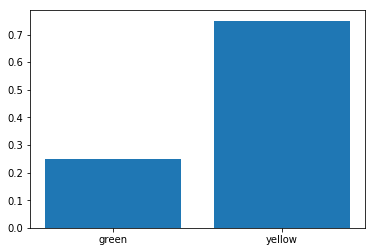

In [35]:
fig, ax = plt.subplots()
ax.bar(range(2), list(a1.values()), align='center')
plt.xticks(range(2), list(a1.keys()))
plt.show()